# insights
Investigating the effects of each electoral process

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import electoral_processes as ep

In [19]:
ep.Voter.reset_ids()
population = ep._get_voters("ElectoralProcesses/",n_voters=10000,n_opinions=2, population_num=1)
nominees   = ep.choose_candidates(population, 2, 10) 

In [20]:
elected_gen = ep.general_election(population, nominees)
elected_rc  = ep.ranked_choice_voting(population, nominees)
print(elected_gen.id, elected_rc.id)

2011.0 2894.0


In [21]:
happiness_gen = ep.calculate_happiness(population, elected_gen)
happiness_rc  = ep.calculate_happiness(population, elected_rc)

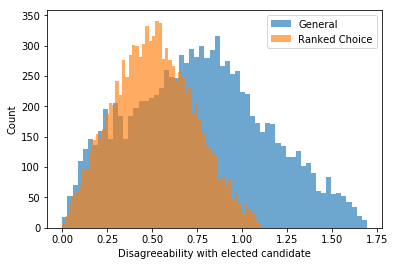

In [22]:
plt.hist(happiness_gen, label="General", bins=60,alpha=0.65,fill='stepfill')
plt.hist(happiness_rc, label="Ranked Choice",bins=60,alpha=0.65,fill='stepfill')
plt.legend()
plt.ylabel("Count")
plt.xlabel("Disagreeability with elected candidate")
plt.show()

In [23]:
opinion1, opinion2 = zip(*[v.opinions for v in population])

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


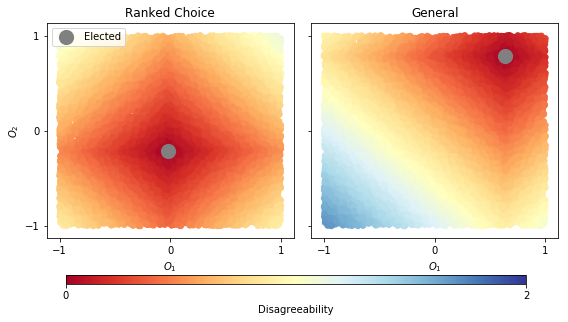

In [24]:
cm = plt.cm.get_cmap('RdYlBu')

#f#ig = plt.figure(figsize=(16,8))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), sharey=True)
sc = ax1.scatter(opinion1, opinion2, c=happiness_rc, vmax=2, cmap=cm)
sc = ax2.scatter(opinion1, opinion2, c=happiness_gen, vmax=2, cmap=cm)

ax1.scatter(*elected_rc.opinions, label='Elected',s=200,color='grey')
ax2.scatter(*elected_gen.opinions, label='Elected',s=200,color='grey')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.12, 0.001, 0.8, 0.03])
cbar = fig.colorbar(sc, ticks=[0,2], orientation='horizontal', cax=cbar_ax)
cbar.set_label('Disagreeability')

ax1.set_xlabel(r"$O_1$")
ax1.set_ylabel(r"$O_2$")
ax2.set_xlabel(r"$O_1$")

ax1.set_xticks(np.arange(-1,1.1,1))
ax1.set_yticks(np.arange(-1,1.1,1))
ax2.set_xticks(np.arange(-1,1.1,1))
ax2.set_yticks(np.arange(-1,1.1,1))
ax1.set_title("Ranked Choice")
ax2.set_title("General")
ax1.legend()
plt.tight_layout()
plt.savefig("figs/rc-gen_anecdotal_comparison.pdf")
plt.show()